<div style="display: flex; justify-content: flex-start; align-items: center;">
    <a href="https://www.youtube.com/watch?v=MDAkgkWwtwM" target="_blank">
        <img src="https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/youtube.png" alt="KMeans Youtube Video" style="height: 40px;">
</div>

### Part 1: Introduction to Time Series Analysis

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">The Nature of Time Series Data</h3>
</div>

* Imagine you're tracking the temperature in your city every hour, monitoring your company's daily sales, or watching stock prices change minute by minute.
* What makes this data special is that, unlike a typical dataset where each row is independent, the order matters.
* Each observation is connected to the ones that came before it.
* Understanding these connections is the key to making accurate predictions about the future.

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Time Series in Everyday Life</h3>
</div>

* Time series data surrounds us in everyday life.
* When you check the weather forecast, that's time series analysis at work.
* When businesses plan inventory for the holiday season, they're using time series methods.
* When your fitness tracker predicts your sleep patterns, it's analyzing time series data.
* The fundamental insight is simple yet powerful: the past contains patterns that help us understand the future.

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Components of a Time Series (The Symphony Analogy)</h3>
</div>

* Time series data typically consists of several components working together.

* Understanding these components is essential before we can build any forecasting model.

* Think of a time series as a symphony where different instruments play together.

* Trend

  * The overall direction of the melody: is the music building to a crescendo or fading away?
  * In business terms, this might be a company's steady growth over years.

* Seasonality

  * The recurring rhythms that repeat at regular intervals, like the chorus that comes back in every verse.
  * Examples include the spike in retail sales every December or increased ice cream sales every summer.

* Cyclical Variations

  * Variations that don't follow a fixed schedule.
  * Examples include economic expansions and recessions that happen over years but not at predictable intervals.

* Residual / Noise

  * The random, unpredictable variations that remain after we account for trend, seasonality, and cyclical effects.

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/ts_components.jpg" alt="Time Series Components" width="600"/>
</div>

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Why Decomposition Matters for Forecasting</h3>
</div>

* Understanding these components is not just academic; it directly informs how we approach forecasting.
* If we can identify and model each component separately, we can build more accurate and interpretable predictions.
* This decomposition approach is at the heart of many modern forecasting methods.

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Getting Started with Time Series in Pandas</h3>
</div>

* Before analyzing patterns or building models, we must properly handle time series data in Python.

* The pandas library includes powerful tools designed specifically for temporal data.

* Mastering these tools is the first step toward effective time series analysis.

* The core concept is the **datetime index**.

  * Unlike regular row numbers, a datetime index tells pandas that data points occur across time.
  * This enables time-aware operations that would otherwise be difficult or impossible.

* We begin by creating a simple time series to explore how datetime indexing works in practice.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Set random seed for reproducibility
np.random.seed(42)

# Create a date range - this will be our time index
# We're creating daily data for one year
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

# Generate synthetic time series data with trend and seasonality
# This simulates realistic data: a random walk with an annual seasonal pattern
n_points = len(dates)
trend = np.linspace(100, 130, n_points)  # Linear upward trend
seasonal = 10 * np.sin(2 * np.pi * np.arange(n_points) / 365)  # Yearly seasonality
noise = np.random.randn(n_points) * 3  # Random fluctuations
values = trend + seasonal + noise

# Create DataFrame with datetime index
ts_data = pd.DataFrame({'value': values}, index=dates)

print("First few rows of our time series:")
print(ts_data.head())
print(f"\nDataFrame shape: {ts_data.shape}")
print(f"Date range: from {ts_data.index.min()} to {ts_data.index.max()}")

First few rows of our time series:
                 value
2023-01-01  101.490142
2023-01-02   99.839758
2023-01-03  102.452117
2023-01-04  105.332539
2023-01-05  100.315234

DataFrame shape: (365, 1)
Date range: from 2023-01-01 00:00:00 to 2023-12-31 00:00:00


<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Resampling</h3>
</div>

Now that we have our time series properly indexed, let's explore the operations that make pandas so powerful for temporal data.  

One of the most useful operations is **resampling**, which allows us to change the frequency of our observations. 
Perhaps you have hourly data but want to analyze daily or monthly patterns. Resampling makes this transformation straightforward.


In [2]:
# Resampling: Converting daily data to different frequencies
# This is incredibly useful for getting different perspectives on your data

# Monthly averages - smooths out daily noise
monthly_avg = ts_data.resample('M').mean()
print("Monthly averages:")
print(monthly_avg.head())

# Weekly sums - useful if you're looking at cumulative effects
weekly_sum = ts_data.resample('W').sum()

# Quarterly statistics - common in business reporting
quarterly_stats = ts_data.resample('Q').agg(['mean', 'std', 'min', 'max'])
print("\nQuarterly statistics:")
print(quarterly_stats)

Monthly averages:
                 value
2023-01-31  103.155174
2023-02-28  110.104059
2023-03-31  115.680122
2023-04-30  118.185121
2023-05-31  118.084337

Quarterly statistics:
                 value                                  
                  mean       std         min         max
2023-03-31  109.631198  6.072669   97.550803  121.065418
2023-06-30  117.881043  2.881317  112.793236  126.010152
2023-09-30  112.481356  3.434507  102.073468  124.378281
2023-12-31  120.039389  5.648432  107.819683  133.662940


C:\Users\me\AppData\Local\Temp\ipykernel_9924\3897107547.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = ts_data.resample('M').mean()
C:\Users\me\AppData\Local\Temp\ipykernel_9924\3897107547.py:13: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_stats = ts_data.resample('Q').agg(['mean', 'std', 'min', 'max'])


<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Rolling Window</h3>
</div>

* Another critical concept in time series analysis is the **rolling window**.
* Think of it as a sliding window that moves through your data, computing statistics over a fixed number of observations at a time.
* This is how we calculate moving averages, which smooth out short-term fluctuations and help reveal longer-term trends. Rolling statistics are fundamental to many trading strategies and trend detection algorithms.

In [8]:
# Rolling window calculations - these help smooth data and identify trends
# The window parameter defines how many observations to include

# 7-day moving average - smooths weekly fluctuations
ts_data['rolling_mean_7'] = ts_data['value'].rolling(window=7).mean()

# 7-day rolling standard deviation - measures volatility
ts_data['rolling_std_7'] = ts_data['value'].rolling(window=7).std()

# 30-day moving average - shows longer-term trends
ts_data['rolling_mean_30'] = ts_data['value'].rolling(window=30).mean()

print("Time series with rolling statistics:")
print(ts_data.head(35))  # Note: first 6 rows of 7-day rolling will be NaN

Time series with rolling statistics:
                 value  rolling_mean_7  rolling_std_7  rolling_mean_30  \
2023-01-01  101.490142             NaN            NaN              NaN   
2023-01-02   99.839758             NaN            NaN              NaN   
2023-01-03  102.452117             NaN            NaN              NaN   
2023-01-04  105.332539             NaN            NaN              NaN   
2023-01-05  100.315234             NaN            NaN              NaN   
2023-01-06  100.569325             NaN            NaN              NaN   
2023-01-07  106.263161      102.323182       2.535268              NaN   
2023-01-08  104.081308      102.693349       2.582098              NaN   
2023-01-09  100.623705      102.805341       2.451395              NaN   
2023-01-10  103.912527      103.013971       2.478321              NaN   
2023-01-11  101.146854      102.416016       2.325939              NaN   
2023-01-12  101.391671      102.569793       2.195846              NaN   
2

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Plot original time series</h3>
</div>

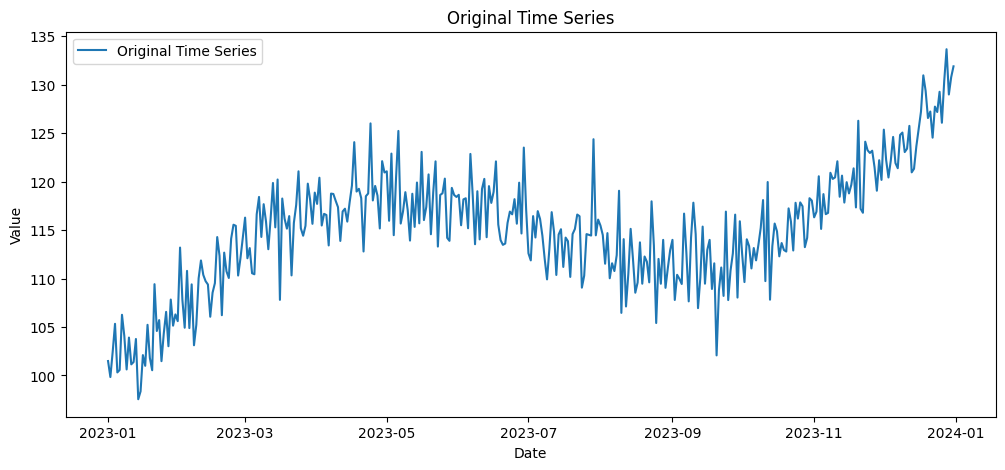

In [ ]:
# -------------------------------
# 1. Plot original time series
# -------------------------------
plt.figure(figsize=(12, 5))
plt.plot(ts_data['value'], label='Original Time Series')
plt.title("Original Time Series")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Plot smoothed series</h3>
</div>

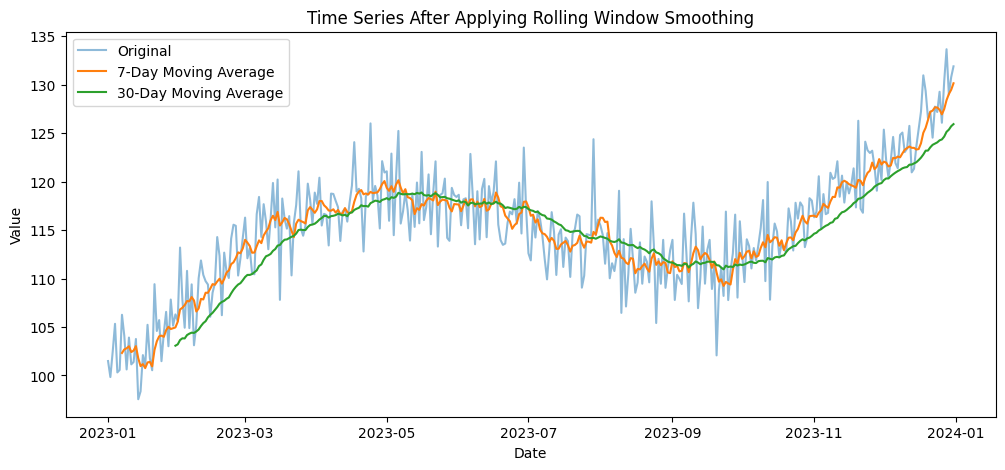

In [11]:
# -------------------------------
# 3. Plot smoothed series
# -------------------------------
plt.figure(figsize=(12, 5))
plt.plot(ts_data['value'], label='Original', alpha=0.5)
plt.plot(ts_data['rolling_mean_7'], label='7-Day Moving Average')
plt.plot(ts_data['rolling_mean_30'], label='30-Day Moving Average')
plt.title("Time Series After Applying Rolling Window Smoothing")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()


<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Lagged Values</h3>
</div>

* The concept of **lagged values** is equally important. A lag is simply a previous value of the series. 
* If you're predicting tomorrow's temperature, yesterday's temperature is a lag-1 variable. 
* Last week's temperature would be lag-7. 
* Lagged variables are the building blocks of many forecasting models because they capture the autocorrelation - the relationship between a value and its past values.

In [4]:
# Creating lagged features - crucial for many forecasting models
# These show you what the value was N periods ago

ts_data['lag_1'] = ts_data['value'].shift(1)  # Yesterday's value
ts_data['lag_7'] = ts_data['value'].shift(7)  # Value from a week ago
ts_data['lag_30'] = ts_data['value'].shift(30)  # Value from a month ago

# Differences - showing change from previous period
# This is key for making non-stationary series stationary
ts_data['diff_1'] = ts_data['value'].diff(1)  # Day-to-day change
ts_data['diff_7'] = ts_data['value'].diff(7)  # Week-to-week change

print("Time series with lags and differences:")
print(ts_data.head(35))

Time series with lags and differences:
                 value  rolling_mean_7  rolling_std_7  rolling_mean_30  \
2023-01-01  101.490142             NaN            NaN              NaN   
2023-01-02   99.839758             NaN            NaN              NaN   
2023-01-03  102.452117             NaN            NaN              NaN   
2023-01-04  105.332539             NaN            NaN              NaN   
2023-01-05  100.315234             NaN            NaN              NaN   
2023-01-06  100.569325             NaN            NaN              NaN   
2023-01-07  106.263161      102.323182       2.535268              NaN   
2023-01-08  104.081308      102.693349       2.582098              NaN   
2023-01-09  100.623705      102.805341       2.451395              NaN   
2023-01-10  103.912527      103.013971       2.478321              NaN   
2023-01-11  101.146854      102.416016       2.325939              NaN   
2023-01-12  101.391671      102.569793       2.195846              NaN   

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Extract Time-Based Features</h3>
</div>

* Pandas also makes it easy to extract time-based features, which are often valuable predictors in forecasting models. 
* The month of the year, day of the week, or quarter can all be significant. 
* For instance, retail sales patterns differ dramatically between weekdays and weekends, or between December and other months.

In [6]:
# Extracting time components - these become features for modeling
ts_data['year'] = ts_data.index.year
ts_data['month'] = ts_data.index.month
ts_data['day_of_week'] = ts_data.index.dayofweek  # Monday=0, Sunday=6
ts_data['day_of_year'] = ts_data.index.dayofyear
ts_data['quarter'] = ts_data.index.quarter

# Cyclical encoding - this is important for circular time features
# Why? Because December (month 12) is actually close to January (month 1)
ts_data['month_sin'] = np.sin(2 * np.pi * ts_data['month'] / 12)
ts_data['month_cos'] = np.cos(2 * np.pi * ts_data['month'] / 12)

print("Time series with extracted features:")
print(ts_data[['value', 'month', 'day_of_week', 'quarter']].head(10))

Time series with extracted features:
                 value  month  day_of_week  quarter
2023-01-01  101.490142      1            6        1
2023-01-02   99.839758      1            0        1
2023-01-03  102.452117      1            1        1
2023-01-04  105.332539      1            2        1
2023-01-05  100.315234      1            3        1
2023-01-06  100.569325      1            4        1
2023-01-07  106.263161      1            5        1
2023-01-08  104.081308      1            6        1
2023-01-09  100.623705      1            0        1
2023-01-10  103.912527      1            1        1


<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Visualize Time Series</h3>
</div>

Let's visualize our time series to see these concepts in action. 

Visualization is not just about making pretty pictures - it's about understanding your data's behavior, spotting anomalies, and getting intuition about what modeling approaches might work.

C:\Users\me\AppData\Local\Temp\ipykernel_9924\636133491.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_plot = ts_data.resample('M').mean()


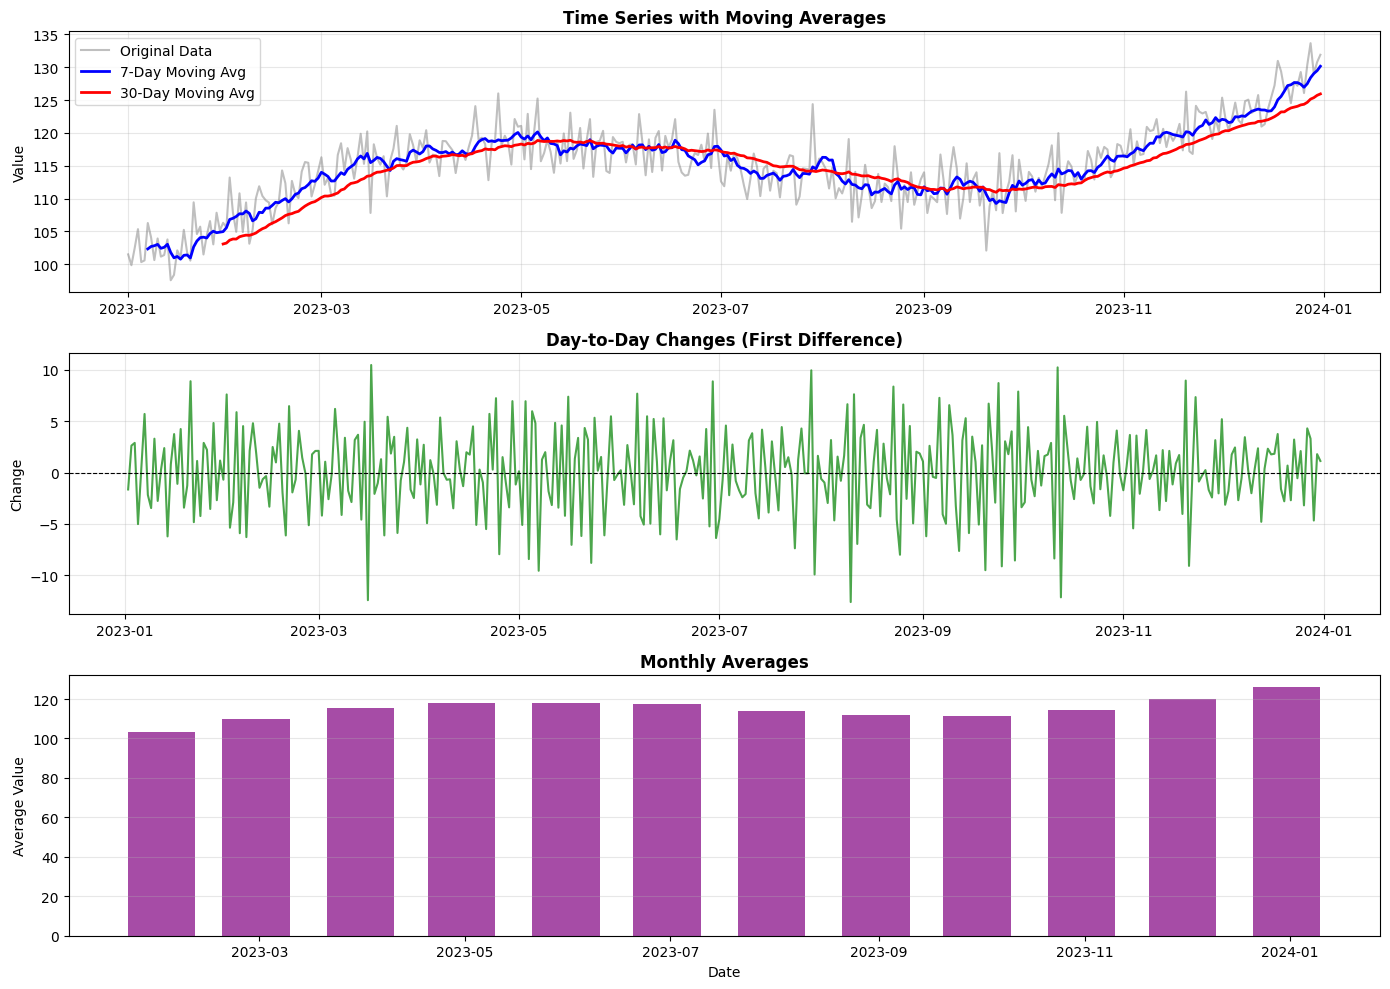

In [7]:
# Create a comprehensive visualization
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Original series with rolling mean
axes[0].plot(ts_data.index, ts_data['value'], label='Original Data', alpha=0.5, color='gray')
axes[0].plot(ts_data.index, ts_data['rolling_mean_7'], label='7-Day Moving Avg', 
             linewidth=2, color='blue')
axes[0].plot(ts_data.index, ts_data['rolling_mean_30'], label='30-Day Moving Avg', 
             linewidth=2, color='red')
axes[0].set_title('Time Series with Moving Averages', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Value')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Day-to-day differences
axes[1].plot(ts_data.index, ts_data['diff_1'], color='green', alpha=0.7)
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=0.8)
axes[1].set_title('Day-to-Day Changes (First Difference)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Change')
axes[1].grid(True, alpha=0.3)

# Monthly averages
monthly_plot = ts_data.resample('M').mean()
axes[2].bar(monthly_plot.index, monthly_plot['value'], width=20, alpha=0.7, color='purple')
axes[2].set_title('Monthly Averages', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Average Value')
axes[2].set_xlabel('Date')
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### Part 2: Statistical Methods for Time Series Forecasting

Now that we understand how to work with time series data, we need to address a fundamental question: how do we actually forecast future values? 

The statistical approach to time series has been refined over decades and provides both powerful methods and important theoretical insights. 

These classical methods remain highly relevant today, often outperforming more complex machine learning approaches, especially when you have limited data or need interpretable models.

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">The Concept of Stationarity</h3>
</div>

* Before building statistical models, we must understand **stationarity**, one of the most important concepts in time series analysis.

* A stationary time series has statistical properties—especially **mean** and **variance**—that remain constant over time.

* Any segment of a stationary series should look statistically similar to any other segment, even if the actual values differ.

* Stationarity matters because many classical time series models assume it.

  * If the series has a changing trend, shifting mean, or increasing volatility, these models break down.
  * It's like trying to hit a moving target that is also changing size; the mathematics becomes unstable.

* To check stationarity, we use the **Augmented Dickey-Fuller (ADF) test**.

  * Null hypothesis: the series is **non-stationary**.
  * A small p-value (typically below 0.05) means we can reject the null and conclude the series is stationary.


In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(series, name="Series"):
    """
    Perform comprehensive stationarity test
    This helps us understand if we need to transform our data before modeling
    """
    # Drop any NaN values
    series = series.dropna()
    
    print(f"\n{'='*60}")
    print(f"Stationarity Test for: {name}")
    print(f"{'='*60}")
    
    # Perform Augmented Dickey-Fuller test
    result = adfuller(series)
    
    print(f'ADF Statistic: {result[0]:.6f}')
    print(f'p-value: {result[1]:.6f}')
    print(f'Number of lags used: {result[2]}')
    print(f'Number of observations: {result[3]}')
    print('\nCritical Values:')
    for key, value in result[4].items():
        print(f'  {key}: {value:.3f}')
    
    # Interpretation
    if result[1] <= 0.05:
        print(f"\n✓ Result: The series IS stationary (p-value = {result[1]:.6f})")
        print("  We can proceed with modeling without transformation.")
    else:
        print(f"\n✗ Result: The series is NOT stationary (p-value = {result[1]:.6f})")
        print("  We need to difference the series or remove trend/seasonality.")
    print(f"{'='*60}\n")

# Test original series
test_stationarity(ts_data['value'], "Original Series")

# Test differenced series
test_stationarity(ts_data['diff_1'], "First Differenced Series")

If our series is not stationary, we have several options. The most common approach is **differencing** - subtracting each value from the previous value. This removes trends and often makes the series stationary. For seasonal data, we might need seasonal differencing, where we subtract the value from the same season in the previous cycle.


<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Understanding Autocorrelation and Partial Autocorrelation</h3>
</div>

* After achieving stationarity, the next step is understanding the **autocorrelation structure** of the series.

* **Autocorrelation** measures how strongly the current value is related to its past values.

  * It helps answer questions like:

    * If you know today’s temperature, how well can you predict tomorrow’s?
    * How about a week from now?
  * The **Autocorrelation Function (ACF)** shows these relationships across different lags.

* The **Partial Autocorrelation Function (PACF)** provides a deeper view.

  * It measures the correlation between the current value and a specific lag **after removing the effects of all shorter lags**.
  * This allows us to isolate the direct relationship at each lag.

* Understanding the difference between ACF and PACF is essential for selecting appropriate time series models.


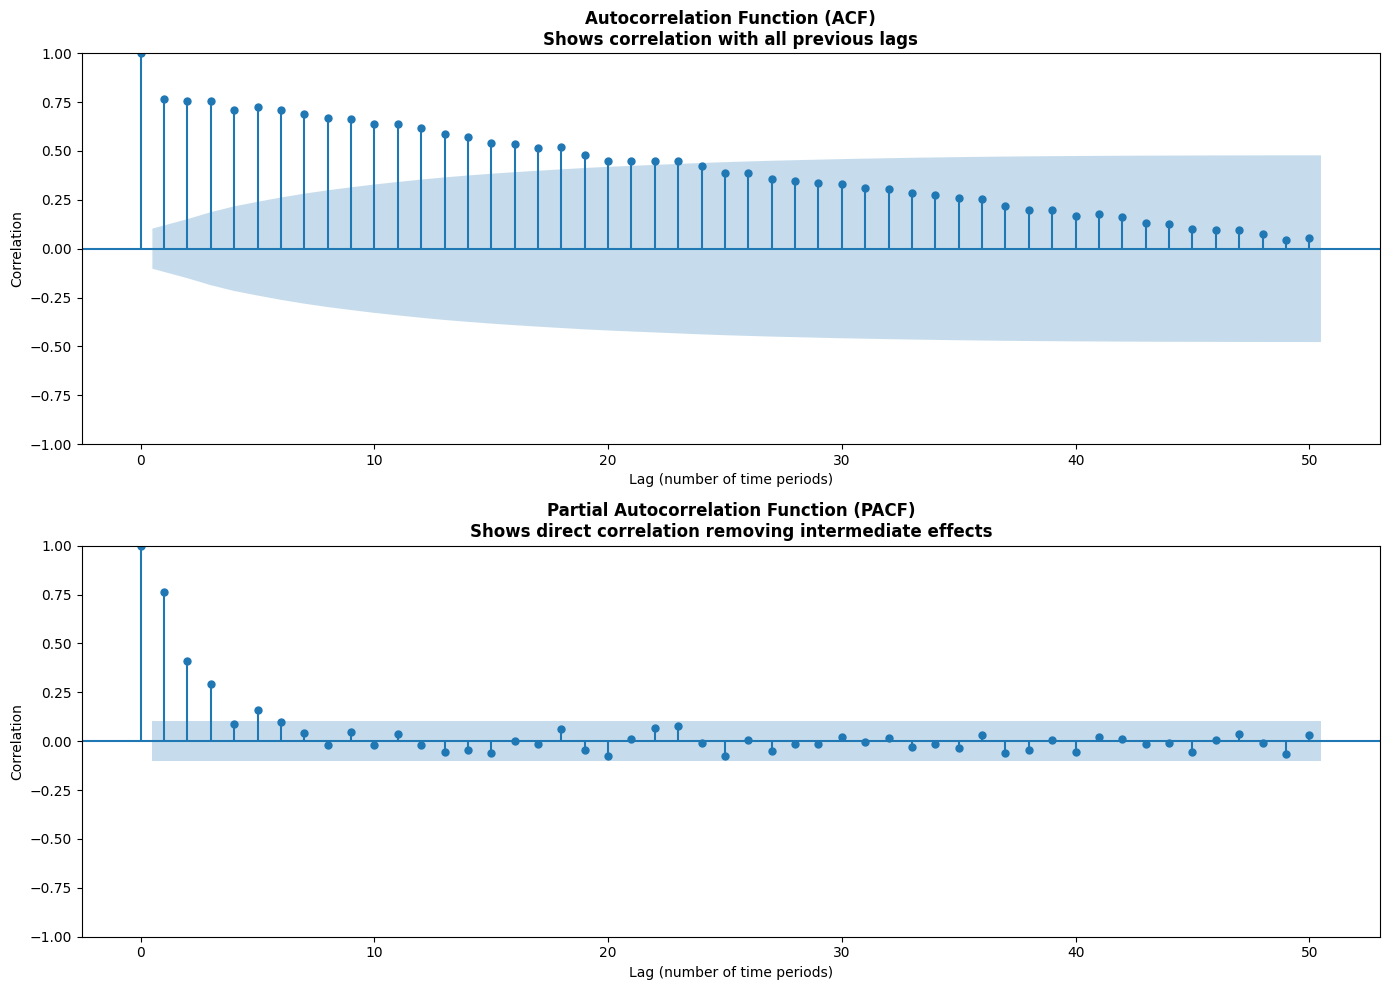


Interpretation Guide:
- Spikes outside the blue shaded area are statistically significant
- ACF shows total correlation (direct + indirect)
- PACF shows only direct correlation
- These plots help us choose the right model parameters


In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Prepare the data - use stationary series
series_for_analysis = ts_data['value'].dropna()

# Create ACF and PACF plots
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Autocorrelation Function (ACF)
# This shows how current values relate to all previous values
plot_acf(series_for_analysis, lags=50, ax=axes[0], alpha=0.05)
axes[0].set_title('Autocorrelation Function (ACF)\nShows correlation with all previous lags', 
                  fontsize=12, fontweight='bold')
axes[0].set_xlabel('Lag (number of time periods)')
axes[0].set_ylabel('Correlation')

# Partial Autocorrelation Function (PACF)
# This shows direct relationship, removing indirect effects
plot_pacf(series_for_analysis, lags=50, ax=axes[1], alpha=0.05)
axes[1].set_title('Partial Autocorrelation Function (PACF)\nShows direct correlation removing intermediate effects', 
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('Lag (number of time periods)')
axes[1].set_ylabel('Correlation')

plt.tight_layout()
plt.show()

print("\nInterpretation Guide:")
print("- Spikes outside the blue shaded area are statistically significant")
print("- ACF shows total correlation (direct + indirect)")
print("- PACF shows only direct correlation")
print("- These plots help us choose the right model parameters")

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">ARIMA Models: The Workhorses of Time Series Forecasting</h3>
</div>

* Now we can discuss **ARIMA**, one of the most widely used model families in time series analysis.

* ARIMA stands for **AutoRegressive Integrated Moving Average**, and each component describes a different part of how the model behaves.

* **AutoRegressive (AR)**

  * Uses the relationship between current values and previous observations.
  * An AR(1) model: today’s value depends on yesterday’s value plus noise.
  * An AR(p) model: uses the previous *p* values.

* **Integrated (I)**

  * Refers to differencing applied to make the series stationary.
  * One difference → I(1); two differences → I(2).
  * Most real-world series require only one or two differences.

* **Moving Average (MA)**

  * Models dependency between the current value and past forecast errors.
  * An MA(1) model: today’s value depends on yesterday’s forecast error.
  * Useful for capturing short-term shocks.

* **Putting It Together: ARIMA(p, d, q)**

  * *p* = number of AR lags
  * *d* = number of differences
  * *q* = number of MA terms
  * Model selection uses ACF/PACF patterns and comparison metrics such as AIC.

* Choosing the right p, d, and q values blends statistical guidance with analytical judgment.


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Prepare data: split into train and test
# We'll use 80% for training and reserve 20% for testing
train_size = int(len(ts_data) * 0.8)
train = ts_data['value'][:train_size]
test = ts_data['value'][train_size:]

print(f"Training set: {len(train)} observations")
print(f"Test set: {len(test)} observations")
print(f"Training period: {train.index.min()} to {train.index.max()}")
print(f"Test period: {test.index.min()} to {test.index.max()}")

# Fit ARIMA model
# We use (1,1,1) as a starting point - this often works reasonably well
# p=1: Use 1 lagged value
# d=1: Difference once to achieve stationarity
# q=1: Use 1 lagged forecast error

print("\nFitting ARIMA(1,1,1) model...")
arima_model = ARIMA(train, order=(1, 1, 1))
arima_fitted = arima_model.fit()

# The summary provides detailed statistics about the fit
print("\n" + "="*70)
print("ARIMA Model Summary")
print("="*70)
print(arima_fitted.summary())

# Make predictions on test set
print("\nGenerating forecasts...")
arima_forecast = arima_fitted.forecast(steps=len(test))

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(test, arima_forecast))
mae = mean_absolute_error(test, arima_forecast)
mape = np.mean(np.abs((test - arima_forecast) / test)) * 100

print("\n" + "="*70)
print("Model Performance on Test Set")
print("="*70)
print(f"RMSE (Root Mean Square Error): {rmse:.4f}")
print(f"  → Average prediction error magnitude")
print(f"MAE (Mean Absolute Error): {mae:.4f}")
print(f"  → Average absolute prediction error")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")
print(f"  → Average percentage error")
print("="*70)

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">SARIMA — Extending ARIMA for Seasonal Patterns</h3>
</div>

* Many real-world time series contain **seasonal patterns** that repeat at regular intervals.

  * Retail sales often spike in December
  * Electricity use increases in summer
  * Flu cases rise in winter

* Standard ARIMA models struggle with these repeating patterns because they occur at fixed intervals.

* **SARIMA (Seasonal ARIMA)** extends ARIMA by adding seasonal terms that capture these repeating effects.

* A SARIMA model is written as:
  **ARIMA(p, d, q)(P, D, Q)m**

  * Lowercase letters (p, d, q) = non-seasonal components
  * Uppercase letters (P, D, Q) = seasonal components
  * *m* = number of periods per season

    * 12 → monthly data with yearly seasonality
    * 7 → daily data with weekly seasonality

* Although the notation looks more complex, the idea is simple:

  * SARIMA adds seasonal versions of AR, differencing, and MA terms that work just like the non-seasonal ones, but operate at seasonal lags.

* This extension makes SARIMA one of the most powerful tools for modeling series with strong seasonal structure.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
# (1,1,1): non-seasonal components
# (1,1,1,7): seasonal components with 7-day seasonality (weekly pattern)
print("\nFitting SARIMA(1,1,1)(1,1,1,7) model...")
print("This captures both short-term dependencies and weekly patterns")

sarima_model = SARIMAX(train, 
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 7))
sarima_fitted = sarima_model.fit(disp=False)

print("\n" + "="*70)
print("SARIMA Model Summary")
print("="*70)
print(sarima_fitted.summary())

# Generate forecasts
print("\nGenerating forecasts with seasonal adjustments...")
sarima_forecast = sarima_fitted.forecast(steps=len(test))

# Evaluate
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_forecast))
sarima_mae = mean_absolute_error(test, sarima_forecast)
sarima_mape = np.mean(np.abs((test - sarima_forecast) / test)) * 100

print("\n" + "="*70)
print("SARIMA Performance on Test Set")
print("="*70)
print(f"RMSE: {sarima_rmse:.4f}")
print(f"MAE: {sarima_mae:.4f}")
print(f"MAPE: {sarima_mape:.2f}%")
print("="*70)

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Exponential Smoothing — A Different Perspective</h3>
</div>

* Exponential smoothing offers an alternative to ARIMA by using a different modeling philosophy.

* Instead of focusing on autocorrelation structures, it applies **exponentially decreasing weights** to past observations.

  * Recent data receives more influence
  * Older data gradually fades in importance

* The **Holt-Winters method (Triple Exponential Smoothing)** extends this idea to handle:

  * Level
  * Trend
  * Seasonality

* This makes it suitable for many real-world time series with both trend and seasonal patterns.

* Exponential smoothing models are often:

  * Faster to train than ARIMA
  * More intuitive and easier to interpret
  * Widely used in business settings where clarity and explainability matter

* This approach provides a smooth, adaptive way to forecast while still capturing essential structure in the data.

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters Exponential Smoothing
# This method smooths level, trend, and seasonal components separately
print("\nFitting Holt-Winters Exponential Smoothing model...")
print("This gives more weight to recent observations")

ets_model = ExponentialSmoothing(
    train,
    seasonal_periods=7,     # Weekly seasonality
    trend='add',            # Additive trend
    seasonal='add',         # Additive seasonality
    damped_trend=True       # Trend dampens over time (more realistic)
)
ets_fitted = ets_model.fit()

# Generate forecasts
print("\nGenerating exponentially smoothed forecasts...")
ets_forecast = ets_fitted.forecast(steps=len(test))

# Evaluate
ets_rmse = np.sqrt(mean_squared_error(test, ets_forecast))
ets_mae = mean_absolute_error(test, ets_forecast)
ets_mape = np.mean(np.abs((test - ets_forecast) / test)) * 100

print("\n" + "="*70)
print("Exponential Smoothing Performance")
print("="*70)
print(f"RMSE: {ets_rmse:.4f}")
print(f"MAE: {ets_mae:.4f}")
print(f"MAPE: {ets_mape:.2f}%")
print("="*70)

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Visualize all our statistical models together to compare their performance</h3>
</div>

NameError: name 'train' is not defined

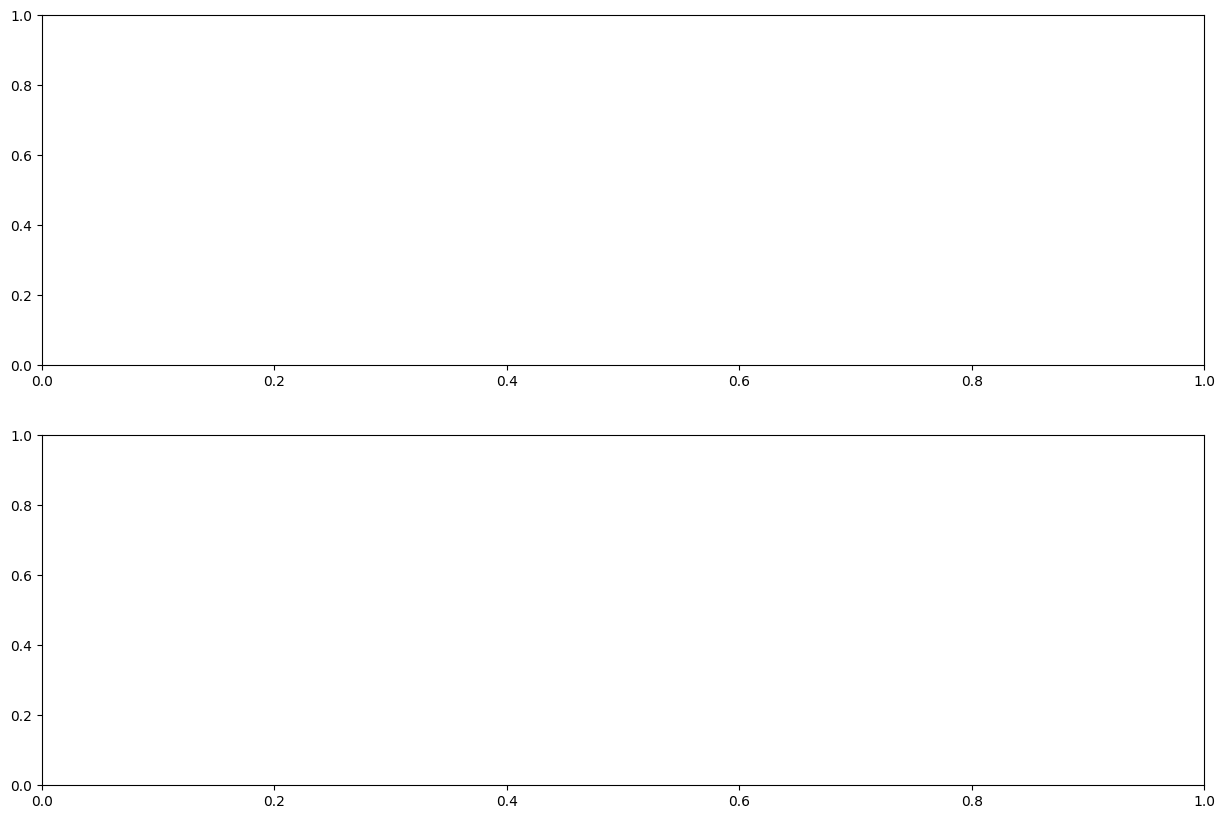

In [13]:
# Comprehensive comparison visualization
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot 1: All forecasts together
axes[0].plot(train.index, train.values, label='Training Data', 
             color='gray', alpha=0.6, linewidth=1)
axes[0].plot(test.index, test.values, label='Actual Test Data', 
             color='black', linewidth=2)
axes[0].plot(test.index, arima_forecast, label=f'ARIMA (RMSE: {rmse:.2f})', 
             linestyle='--', linewidth=2)
axes[0].plot(test.index, sarima_forecast, label=f'SARIMA (RMSE: {sarima_rmse:.2f})', 
             linestyle='--', linewidth=2)
axes[0].plot(test.index, ets_forecast, label=f'ETS (RMSE: {ets_rmse:.2f})', 
             linestyle='--', linewidth=2)
axes[0].axvline(x=test.index[0], color='red', linestyle=':', linewidth=2, 
                label='Forecast Start')
axes[0].set_title('Statistical Models: Comparing Forecasts', 
                  fontsize=14, fontweight='bold')
axes[0].set_ylabel('Value')
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

# Plot 2: Forecast errors
arima_error = test.values - arima_forecast
sarima_error = test.values - sarima_forecast
ets_error = test.values - ets_forecast

axes[1].plot(test.index, arima_error, label='ARIMA Errors', 
             marker='o', linestyle='-', alpha=0.6)
axes[1].plot(test.index, sarima_error, label='SARIMA Errors', 
             marker='s', linestyle='-', alpha=0.6)
axes[1].plot(test.index, ets_error, label='ETS Errors', 
             marker='^', linestyle='-', alpha=0.6)
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1].set_title('Forecast Errors Over Time', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Error (Actual - Predicted)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Insights:")
print("- Consistent errors suggest systematic bias in the model")
print("- Random scattered errors around zero suggest good model fit")
print("- Increasing error magnitude over time suggests model degradation")

## Part 3: Machine Learning Approaches to Time Series

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">From Statistical Models to Machine Learning</h3>
</div>

* Statistical models like ARIMA are powerful, well-understood, and often perform excellently.

* However, they come with important limitations:

  * Assume mostly linear relationships
  * Struggle with multiple seasonalities
  * Do not naturally handle many external variables (features)

* This is where **machine learning** becomes valuable:

  * Can capture complex non-linear patterns
  * Naturally supports multiple features (covariates)
  * Often adapts to different data types with less manual tuning

* We will explore two main ML-oriented approaches for time series:

  * **Facebook Prophet** — a model that bridges statistical and ML ideas
  * **Traditional supervised learning algorithms** adapted to forecasting problems




<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Facebook Prophet — Automated Forecasting at Scale</h3>
</div>

* **Prophet** was developed by Facebook’s Core Data Science team to solve a practical problem:

  * How to let analysts without deep time series expertise generate good forecasts quickly.

* Prophet takes a different philosophical approach than ARIMA:

  * Rather than focusing on autocorrelations, it models the series as a sum of components:

    * **Trend + Seasonality + Holidays + Error**

* Key strengths of Prophet:

  * Flexible and robust for real-world business data
  * Handles missing data gracefully
  * Works well in the presence of outliers
  * Makes it easy to incorporate domain knowledge via holidays and special events

* Because of its **additive component structure**:

  * Each component (trend, seasonality, holidays) can be inspected separately
  * The model is highly interpretable
  * This interpretability is crucial in business settings where stakeholders need to understand *why* a forecast looks the way it does.

In [ ]:
# Note: You may need to install prophet first
# pip install prophet

from prophet import Prophet

# Prepare data for Prophet
# Prophet requires columns named 'ds' (datestamp) and 'y' (value)
print("Preparing data for Prophet...")
prophet_train = pd.DataFrame({
    'ds': train.index,
    'y': train.values
})

prophet_test = pd.DataFrame({
    'ds': test.index,
    'y': test.values
})

print(f"Prophet training data: {len(prophet_train)} observations")
print("Sample of prepared data:")
print(prophet_train.head())

# Initialize Prophet model
# These parameters control how flexible the model is
print("\nInitializing Prophet model...")
prophet_model = Prophet(
    yearly_seasonality=True,      # Model yearly patterns
    weekly_seasonality=True,       # Model weekly patterns
    daily_seasonality=False,       # No daily patterns in our data
    changepoint_prior_scale=0.05,  # Controls trend flexibility (lower = more stable)
    seasonality_prior_scale=10.0,  # Controls seasonality flexibility
    interval_width=0.95            # 95% confidence intervals
)

# Fit the model
print("Fitting Prophet model (this may take a moment)...")
prophet_model.fit(prophet_train)

# Create future dataframe for predictions
# This includes both historical dates and future dates
future = prophet_model.make_future_dataframe(periods=len(test), freq='D')
print(f"\nCreated future dataframe with {len(future)} dates")

# Generate forecast
print("Generating forecast...")
prophet_forecast = prophet_model.predict(future)

# Extract predictions for test period
# We need to match the dates
prophet_test_predictions = prophet_forecast[prophet_forecast['ds'].isin(test.index)]['yhat'].values

# Evaluate
prophet_rmse = np.sqrt(mean_squared_error(test, prophet_test_predictions))
prophet_mae = mean_absolute_error(test, prophet_test_predictions)
prophet_mape = np.mean(np.abs((test - prophet_test_predictions) / test)) * 100

print("\n" + "="*70)
print("Prophet Performance")
print("="*70)
print(f"RMSE: {prophet_rmse:.4f}")
print(f"MAE: {prophet_mae:.4f}")
print(f"MAPE: {prophet_mape:.2f}%")
print("="*70)

One of Prophet's most powerful features is its ability to visualize the decomposition of the forecast into its constituent parts. This helps us understand what's driving the predictions.

In [ ]:
# Visualize the Prophet forecast
fig1 = prophet_model.plot(prophet_forecast)
plt.title('Prophet Forecast with Confidence Intervals', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Visualize the components
# This shows how trend, weekly, and yearly seasonality contribute
fig2 = prophet_model.plot_components(prophet_forecast)
plt.suptitle('Prophet Model Components', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\nUnderstanding the Component Plot:")
print("- Trend: Shows the overall direction (up/down) over time")
print("- Weekly: Shows which days of the week are typically higher/lower")
print("- Yearly: Shows seasonal patterns throughout the year")
print("- The final forecast is the sum of all these components")

Prophet also allows us to add domain-specific information. For instance, if we're forecasting retail sales, we can explicitly model the impact of holidays or promotional events.

In [ ]:
# Advanced Prophet with custom seasonality and holidays
print("\n" + "="*70)
print("Building Advanced Prophet Model with Custom Features")
print("="*70)

# Create holiday dataframe
# In reality, you'd define holidays relevant to your domain
holidays = pd.DataFrame({
    'holiday': 'special_event',
    'ds': pd.to_datetime(['2023-07-04', '2023-12-25']),  # Example holidays
    'lower_window': -1,  # Start considering effect 1 day before
    'upper_window': 1,   # Effect lasts 1 day after
})

# Initialize advanced model
prophet_advanced = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    holidays=holidays,
    changepoint_prior_scale=0.05
)

# Add custom monthly seasonality
# This can capture patterns that recur monthly
prophet_advanced.add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=5  # Higher order = more complex patterns
)

# Fit and predict
print("Fitting advanced model...")
prophet_advanced.fit(prophet_train)

future_advanced = prophet_advanced.make_future_dataframe(periods=len(test), freq='D')
forecast_advanced = prophet_advanced.predict(future_advanced)

print("✓ Advanced Prophet model trained successfully")
print("  Includes: yearly seasonality, weekly seasonality, monthly patterns, and holidays")

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Traditional Machine Learning for Time Series</h3>
</div>

* Beyond specialized tools like Prophet, we can adapt traditional ML models such as:

  * Random Forest
  * Gradient Boosting
  * Neural Networks

* The key enabler is **feature engineering**:

  * Transform the time series problem into a standard supervised learning task
  * Build meaningful input features from historical data

* Core idea: turn forecasting into **regression** by constructing features from:

  * Lagged values (e.g., “yesterday’s value”, “value 7 days ago”)
  * Rolling statistics (e.g., “average of last week”, “rolling standard deviation”)
  * Time-based variables (e.g., “day of week”, “month”, “is holiday?”)

* To predict tomorrow’s value, we feed these engineered features into a regression model and let the algorithm learn the relationships.


In [ ]:
def create_comprehensive_features(df, target_col='value'):
    """
    Transform time series into rich feature set for ML models
    This is where domain knowledge and creativity matter
    """
    df = df.copy()
    
    # Time-based features
    # These capture calendar effects
    df['dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter
    df['dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.isocalendar().week.astype(int)
    df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)
    
    # Cyclical encoding for periodic features
    # Why? Because December (12) is actually close to January (1)
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek'] / 7)
    df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek'] / 7)
    
    # Lag features - past values as predictors
    for lag in [1, 2, 3, 7, 14, 21, 30]:
        df[f'lag_{lag}'] = df[target_col].shift(lag)
    
    # Rolling window features - capturing trends
    for window in [7, 14, 30]:
        df[f'rolling_mean_{window}'] = df[target_col].rolling(window=window).mean()
        df[f'rolling_std_{window}'] = df[target_col].rolling(window=window).std()
        df[f'rolling_min_{window}'] = df[target_col].rolling(window=window).min()
        df[f'rolling_max_{window}'] = df[target_col].rolling(window=window).max()
        
        # Rate of change
        df[f'rolling_mean_{window}_diff'] = df[f'rolling_mean_{window}'].diff()
    
    # Expanding features - cumulative statistics
    df['expanding_mean'] = df[target_col].expanding().mean()
    df['expanding_std'] = df[target_col].expanding().std()
    
    return df

# Apply feature engineering
print("Applying comprehensive feature engineering...")
ml_data = create_comprehensive_features(ts_data[['value']])

# Remove rows with NaN (from lag/rolling windows)
ml_data = ml_data.dropna()

print(f"\nFeature engineering complete!")
print(f"Original features: 1 (just 'value')")
print(f"Total features created: {len(ml_data.columns) - 1}")
print(f"Samples after removing NaN: {len(ml_data)}")
print("\nSample of engineered features:")
print(ml_data.head())

Now we can train traditional ML models on this engineered feature set:

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge

# Prepare features and target
feature_cols = [col for col in ml_data.columns if col != 'value']
X = ml_data[feature_cols]
y = ml_data['value']

# Create time-based split (must respect temporal order!)
# We can't randomly shuffle time series data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"ML Training samples: {len(X_train)}")
print(f"ML Test samples: {len(X_test)}")
print(f"Number of features: {X_train.shape[1]}")

# Train Random Forest
print("\nTraining Random Forest...")
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Train Gradient Boosting
print("Training Gradient Boosting...")
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

# Train Ridge Regression (Linear model with regularization)
print("Training Ridge Regression...")
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

# Evaluate all models
print("\n" + "="*70)
print("Machine Learning Models Performance")
print("="*70)

ml_models = {
    'Random Forest': rf_predictions,
    'Gradient Boosting': gb_predictions,
    'Ridge Regression': ridge_predictions
}

for name, predictions in ml_models.items():
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
    print(f"\n{name}:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  MAPE: {mape:.2f}%")

print("="*70)

An important aspect of tree-based models is understanding which features matter most:

In [ ]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n" + "="*70)
print("Top 15 Most Important Features (Random Forest)")
print("="*70)
print(feature_importance.head(15).to_string(index=False))
print("\nInsights:")
print("- Recent lags (lag_1, lag_2) are often most important")
print("- Rolling statistics capture trend information")
print("- Time features (month, dayofweek) capture seasonality")

# Visualize feature importance
plt.figure(figsize=(12, 6))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance', fontsize=12)
plt.title('Top 15 Feature Importances - Random Forest', 
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Comparing All Approaches</h3>
</div>

Now let's bring everything together and compare all the methods we've explored:

In [ ]:
# Create comprehensive comparison
comparison_results = {
    'Model': [],
    'RMSE': [],
    'MAE': [],
    'MAPE (%)': []
}

# We need to align test sets for fair comparison
# Use the shortest common test period
min_test_length = min(len(test), len(y_test))

# Align all predictions to same test period
test_aligned = test[-min_test_length:].values
arima_aligned = arima_forecast[-min_test_length:]
sarima_aligned = sarima_forecast[-min_test_length:]
ets_aligned = ets_forecast[-min_test_length:]
prophet_aligned = prophet_test_predictions[-min_test_length:]
y_test_aligned = y_test[-min_test_length:].values

# Calculate metrics for each model
all_models = {
    'ARIMA(1,1,1)': arima_aligned,
    'SARIMA(1,1,1)(1,1,1,7)': sarima_aligned,
    'Exponential Smoothing': ets_aligned,
    'Prophet': prophet_aligned,
    'Random Forest': rf_predictions[-min_test_length:],
    'Gradient Boosting': gb_predictions[-min_test_length:],
    'Ridge Regression': ridge_predictions[-min_test_length:]
}

for model_name, predictions in all_models.items():
    rmse = np.sqrt(mean_squared_error(test_aligned, predictions))
    mae = mean_absolute_error(test_aligned, predictions)
    mape = np.mean(np.abs((test_aligned - predictions) / test_aligned)) * 100
    
    comparison_results['Model'].append(model_name)
    comparison_results['RMSE'].append(rmse)
    comparison_results['MAE'].append(mae)
    comparison_results['MAPE (%)'].append(mape)

# Create comparison dataframe
comparison_df = pd.DataFrame(comparison_results)
comparison_df = comparison_df.sort_values('RMSE')

print("\n" + "="*70)
print("FINAL MODEL COMPARISON - Ranked by RMSE")
print("="*70)
print(comparison_df.to_string(index=False))
print("="*70)
print("\nKey Takeaways:")
print("- Lower values are better for all metrics")
print("- RMSE penalizes large errors more than MAE")
print("- MAPE shows percentage error (easier to interpret)")
print("- Best model depends on your specific needs:")
print("  * Interpretability: ARIMA, SARIMA, Prophet")
print("  * Accuracy: Often ML methods, but not always")
print("  * Speed: Exponential Smoothing, Ridge Regression")
print("  * Handling complex patterns: Prophet, ML methods")

# Visualization comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: All predictions
axes[0, 0].plot(test_aligned, label='Actual', color='black', linewidth=2, alpha=0.8)
colors = plt.cm.tab10(np.linspace(0, 1, len(all_models)))
for (name, pred), color in zip(all_models.items(), colors):
    axes[0, 0].plot(pred, label=name, alpha=0.7, linewidth=1.5)
axes[0, 0].set_title('All Model Predictions vs Actual', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Value')
axes[0, 0].legend(loc='best', fontsize=8)
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: RMSE comparison
axes[0, 1].barh(comparison_df['Model'], comparison_df['RMSE'])
axes[0, 1].set_xlabel('RMSE (lower is better)')
axes[0, 1].set_title('Model Comparison: RMSE', fontsize=12, fontweight='bold')
axes[0, 1].invert_yaxis()
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Plot 3: MAE comparison
axes[1, 0].barh(comparison_df['Model'], comparison_df['MAE'], color='orange')
axes[1, 0].set_xlabel('MAE (lower is better)')
axes[1, 0].set_title('Model Comparison: MAE', fontsize=12, fontweight='bold')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Plot 4: MAPE comparison
axes[1, 1].barh(comparison_df['Model'], comparison_df['MAPE (%)'], color='green')
axes[1, 1].set_xlabel('MAPE % (lower is better)')
axes[1, 1].set_title('Model Comparison: MAPE', fontsize=12, fontweight='bold')
axes[1, 1].invert_yaxis()
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Conclusion — Choosing the Right Approach</h3>
</div>

* We've covered a full spectrum of time series methods, from foundational statistical models to modern machine learning approaches.

* Choosing the right technique depends on the problem, the data, and the constraints of your project.

* **When to Use ARIMA / SARIMA**

  * Ideal for well-behaved univariate series
  * Useful when interpretability and statistical inference matter
  * Works well with limited data
  * Downsides: more manual tuning and limited ability to include external variables

* **When to Use Prophet**

  * Excellent for quick, robust forecasts with minimal tuning
  * Handles multiple seasonalities, missing data, and outliers gracefully
  * Easy to incorporate domain knowledge (holidays, events)
  * Highly interpretable for business and stakeholder communication

* **When to Use Machine Learning Methods**

  * Best when external variables strongly influence the target
  * Captures non-linear and complex relationships
  * Useful with large datasets
  * Needs thoughtful feature engineering and careful validation
  * Harder to interpret and prone to overfitting if unchecked

* **Practical Advice**

  * Don’t commit to a single method too early
  * Begin with exploratory data analysis
  * Compare multiple models using proper time-series cross-validation
  * Ensembles often outperform any single method
  * A simpler, trusted model can be more valuable than a complex black box

* As the field evolves, deep learning approaches like LSTMs and Transformers are becoming increasingly influential, but the fundamentals remain essential.

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Key Takeaways and Best Practices</h3>
</div>

* **Data Preparation**

  * Start with clean data, proper datetime indexing, and thorough exploration
  * Check for missing values, outliers, and structural breaks
  * Visualize extensively before modeling

* **Stationarity**

  * Test for stationarity and apply transformations (differencing, detrending) when needed
  * Many statistical models rely on this prerequisite

* **Validation**

  * Never use random splits for time series
  * Use walk-forward or time-aware cross-validation methods
  * Maintain proper temporal order at all times

* **Feature Engineering (for ML Approaches)**

  * Create meaningful features: lags, rolling stats, time-based indicators, domain-specific variables
  * Feature quality often matters more than model selection

* **Model Selection**

  * Evaluate accuracy, interpretability, speed, maintainability, and stakeholder needs
  * Don't focus exclusively on numerical metrics

* **Monitoring**

  * Patterns change — models degrade over time
  * Implement monitoring to detect drift and decide when retraining is needed

* **Documentation**

  * Document assumptions, transformations, and model choices
  * Ensures the project remains understandable months later

* This concludes our comprehensive lecture on time series analysis.

  * You now have a systematic framework from data preparation to model evaluation.
  * The key is practice — apply these methods, experiment, and build intuition through real-world experience.